In [1]:
""" 
Building an Image Recognition Neural Network
The model we'll build will use the classic MNIST dataset with handwritten numbers. 
We'll also cover how to construct a more robust model, make predictions, and get the meta data to determine how well the model actually performs.
"""

import numpy
import pandas
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

# Setting random seeds to get reproducible results
numpy.random.seed(0)
tensorflow.random.set_seed(1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set size: 60000
Testing set size: 10000
The label is 2


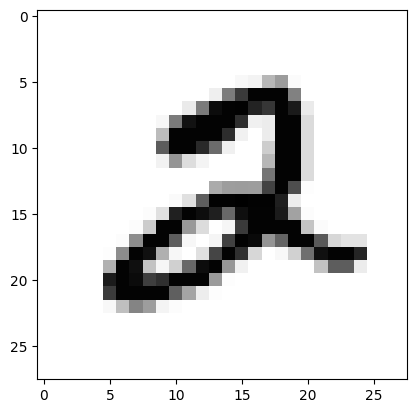

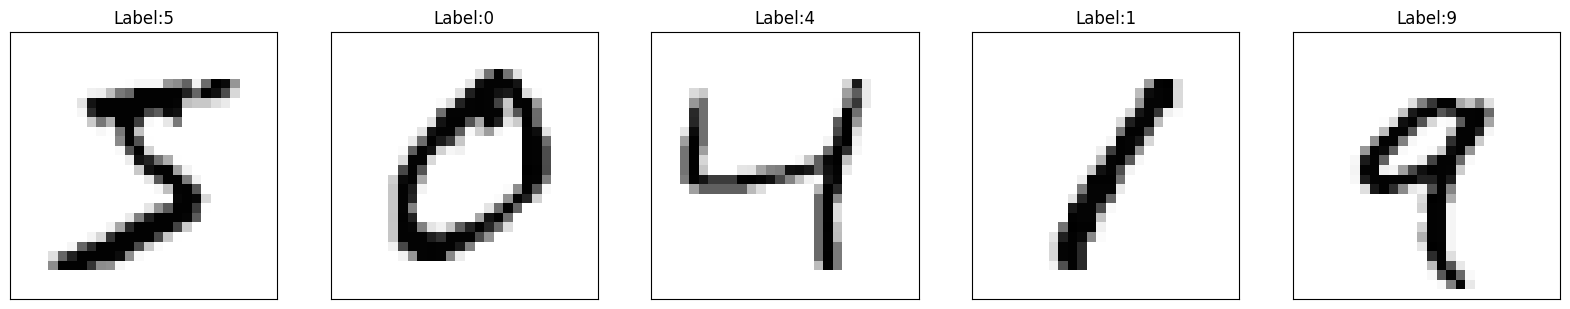

In [2]:
""" 
Reading the data
The built-in dataset is already balanced, so we don't need to worry about stratifying classes to ensure equal representation between the splits. 
In practice, you could use something like Sklearn's train_test_split.
"""

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

plt.imshow(x_train[5], cmap='Greys')
print("The label is", y_train[5])

# Plotting some examples of numbers
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='Greys')
    ax.set_title('Label:' + str(y_train[i]))

In [3]:
""" 
Pre-processing the data
We'll have to reshape the data to make it train faster, and we'll also use the pandas.factorize to ensure we get the classes despite them being synonymous with numbers.
"""

# reshaping the features
num_columns = 28*28
x_train_reshaped = x_train.reshape(-1, num_columns) # -1 is a placeholdfer for the dataset's size
x_test_reshaped = x_test.reshape(-1, num_columns)

# This isn'y necessary since numbers are coincidentally the same as the class labels, but it's a good practice.
y_train_cat, y_train_labels = pandas.factorize(y_train, sort=True) #returns 1D array
y_test_cat, y_test_labels = pandas.factorize(y_test, sort=True) #sort to ensure class labels and numbers align

# The test and train are balanced so they should have the same number of classes
num_labels = len(set(list(y_test_labels) + list(y_test_labels))) # Add lists then use set to get unique values
assert num_labels == 10

print(x_train_reshaped.shape)
print(y_train_cat.shape)
print(num_labels)

(60000, 784)
(60000,)
10


In [4]:
""" 
Model Structure
We'll use a sequential model to add a few dense layers with the LeakyReLu activation function. 
ReLu is good, but it's prone to zeroing out. We'll once againt add dropout and set our unit sizes as powers of 2. 
We also use sparse_categorical_crossentropy since our labels are 1D.
"""

# Building the model
num_units_penultimate = 2**6
model = Sequential()
model.add(Dense(2**7, input_shape=(num_columns,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(.2))
model.add(Dense(num_units_penultimate))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(.2))
model.add(Dense(num_labels, activation='softmax')) #two or more classes

# Compiling the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

/Users/kylestanford/Library/CloudStorage/OneDrive-Partners/Documents/GitHub/Grokking-Machine-Learning/grokking_my_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-11 15:31:19.881888: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-08-11 15:31:19.881921: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-08-11 15:31:19.881928: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2025-08-11 15:31:19.881950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-11 15:31:19.8

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
""" 
Training the Model
It's a good practice to set your batch size equal to the number of penultimate neurons in your layer. 
Training accuracy will vary due to the stochastic nature of the model, but you can clearly see the loss going down and the accuracy going up. 
We'll save the model to the history instance so we can get the metadata.
"""

history = model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=num_units_penultimate, verbose=1)

Epoch 1/10


2025-08-11 15:32:54.409414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7050 - loss: 3.0082
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8489 - loss: 0.5632
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8878 - loss: 0.4152
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9057 - loss: 0.3425
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9174 - loss: 0.3010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9277 - loss: 0.2612
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9315 - loss: 0.2439
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9369 - loss: 0.2237
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9404 - loss: 0.2087
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9438 - loss: 0.1974


In [6]:
# neat trick to get class attributes
history.__dict__

{'params': {'verbose': 1, 'epochs': 10, 'steps': 938},
 '_model': <Sequential name=sequential, built=True>,
 'history': {'accuracy': [0.7049833536148071,
   0.8488500118255615,
   0.8877833485603333,
   0.9057499766349792,
   0.9173833131790161,
   0.9277499914169312,
   0.9314500093460083,
   0.9369166493415833,
   0.940416693687439,
   0.9437500238418579],
  'loss': [3.0082128047943115,
   0.5632208585739136,
   0.41522106528282166,
   0.3424506187438965,
   0.3009812533855438,
   0.26117464900016785,
   0.2439001202583313,
   0.2237272560596466,
   0.20873285830020905,
   0.19737601280212402]},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [7]:
""" 
Making predictions
We'll have the trained model return a matrix of predictions and use argmax to get the index with the highest probability to get the prediction in each row. 
For example, if there are 3 classes and the matrix has a row like [0.4, 0.1, 0.5], then the third class (index 2) will be the class our softmax produced.
"""

matrix_predictions = model.predict(x_test_reshaped)
print(matrix_predictions.shape) # the columns equals the number of classes
print("Matrix row of predictions:", matrix_predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
(10000, 10)
Matrix row of predictions: [2.5218959e-22 1.9547016e-17 1.3608227e-24 1.7313050e-12 1.3324629e-23
 6.0127213e-21 0.0000000e+00 1.0000000e+00 1.8882411e-17 6.8897144e-10]


In [8]:
predictions = [numpy.argmax(pred) for pred in matrix_predictions]
array_correct = predictions == y_test_cat # numpy arrays allow point-wise comparisons, and this is a boolean 1D vector

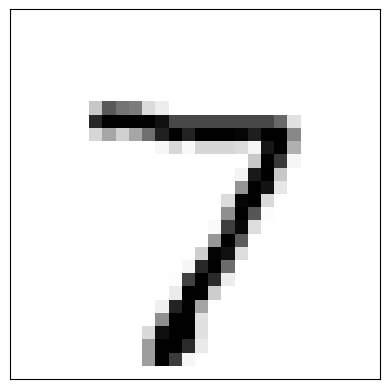

The label is 7
The prediction is 7


In [10]:
index_correct = numpy.where(array_correct == True)[0][0]
plt.imshow(x_test[index_correct], cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()
print('The label is', y_test_cat[index_correct])
print('The prediction is', predictions[index_correct])

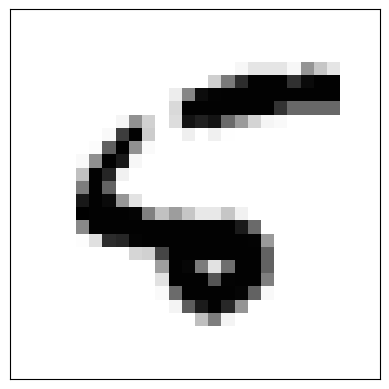

The label is 5
The prediction is 6


In [12]:
index_incorrect = numpy.where(array_correct == False)[0][0]
plt.imshow(x_test[index_incorrect], cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()
print('The label is', y_test_cat[index_incorrect])
print('The prediction is', predictions[index_incorrect])

In [13]:
num_correct = array_correct.sum()
print('The model is correct', num_correct, 'time out of', len(y_test_cat))
print('The accuracy is', num_correct/len(y_test_cat))

The model is correct 9583 time out of 10000
The accuracy is 0.9583
